<a href="https://colab.research.google.com/github/wesleyc00/analise-de-dados/blob/main/Projeto_unicornio_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler os dados
Base_Dados = pd.read_csv('/content/unicornios-dataset.csv')

# Verificar Dimensão
Base_Dados.shape

(1186, 7)

In [ ]:
# Primeiros registros
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Colunas
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
# Renomear
Base_Dados.rename(
    columns={
      'Unnamed: 0' : 'ID',
      'Company' : 'Empresa',
      'Valuation ($B)' : 'Valor ($)',
      'Date Joined' : 'Data de Adesão',
      'Country' : 'Pais',
      'City' : 'Cidade',
      'Industry': 'Setor',
      'Select Investors': 'Investidores',
    }, inplace=True)

In [ ]:
# Verificar tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
# Verificando valores nulos nas colunas
Base_Dados.isnull().sum()

,0
Empresa,0
Valor ($),0
Data de Adesão,0
Pais,0
City,0
Setor,0
Investors,18


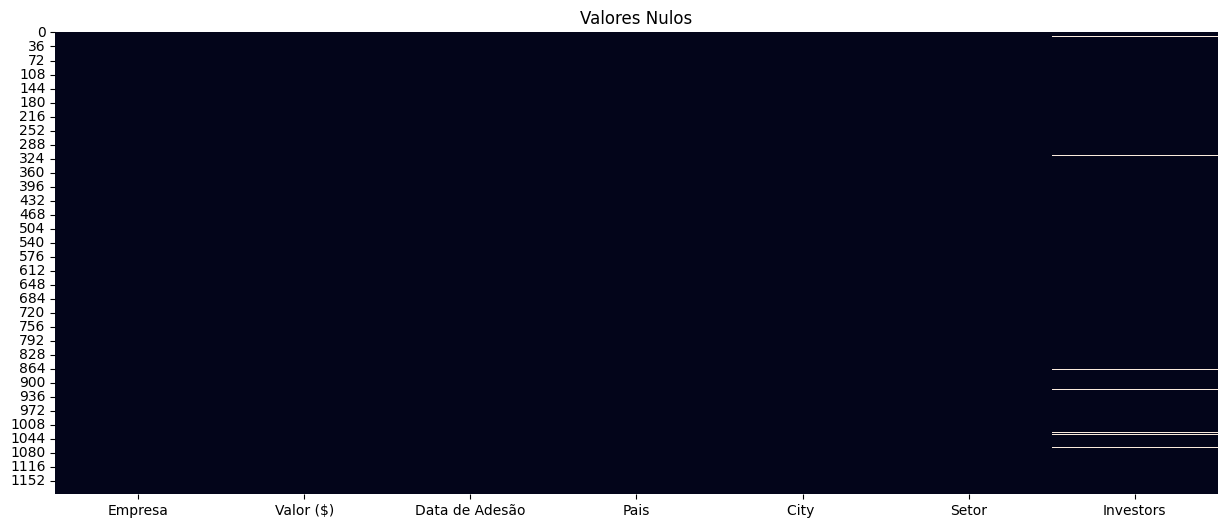

In [ ]:
# Grafica
plt.figure(figsize=(15,6))
plt.title('Valores Nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);


In [ ]:
# Campos unicos
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
# Valores unicos
Base_Dados['Setor'].value_counts()

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
"Supply chain, logistics, & delivery",65
Other,65
Cybersecurity,58
Data management & analytics,45


In [ ]:
# Normalize

Base_Dados['Setor'].value_counts(normalize=True)

,proportion
Setor,
Fintech,0.201518
Internet software & services,0.188870
E-commerce & direct-to-consumer,0.086847
Health,0.079258
Artificial intelligence,0.062395
"Supply chain, logistics, & delivery",0.054806
Other,0.054806
Cybersecurity,0.048904
Data management & analytics,0.037943


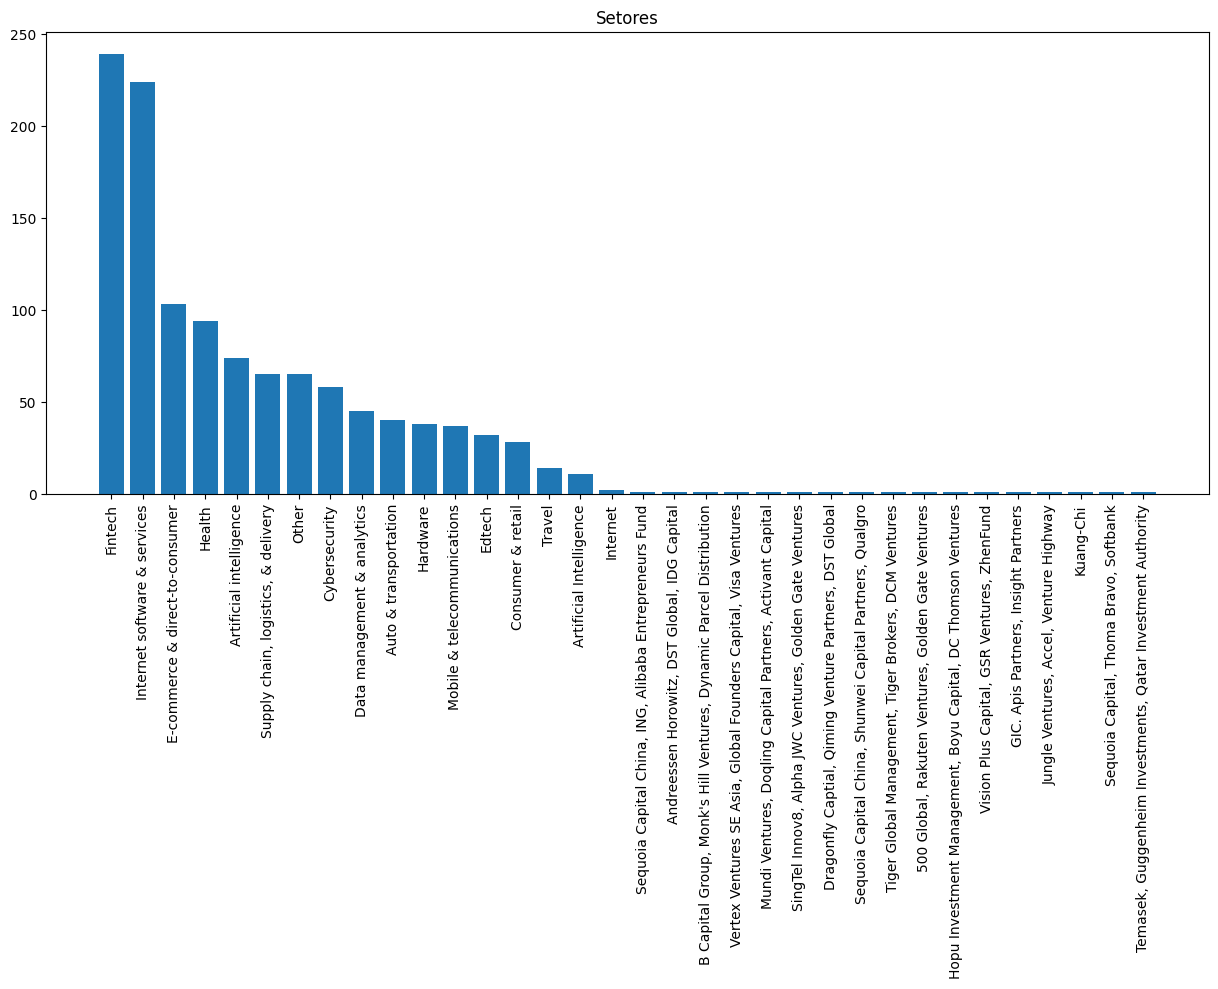

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts());
plt.xticks(rotation=90);

In [ ]:
Analise = round(Base_Dados['Pais'].value_counts( normalize=True) * 100,1)

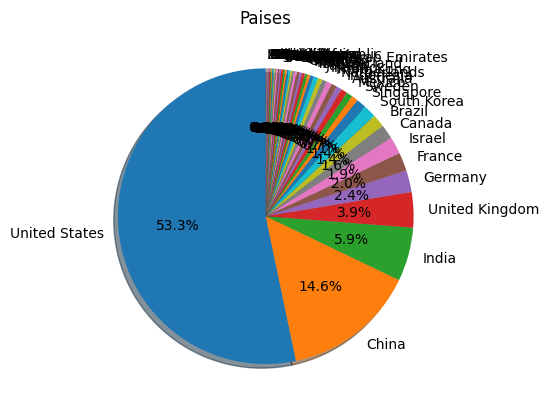

<Figure size 1500x600 with 0 Axes>

In [ ]:
plt.pie(Analise,
        labels = Analise.index,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%');
plt.title('Paises');
plt.figure(figsize=(15,6));

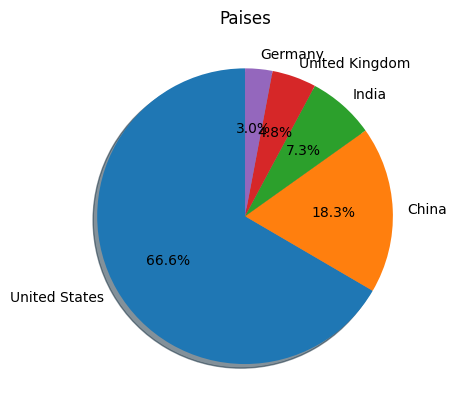

<Figure size 1500x600 with 0 Axes>

In [ ]:
plt.pie(Analise.head(5),
        labels = Analise.index[0:5],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%');
plt.title('Paises');
plt.figure(figsize=(15,6));

In [ ]:
# Conversão para Data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2018-07-03
3,2014-01-23
4,2018-01-08


In [ ]:
# Extrair ano e mes

Base_Dados['Ano'] = Base_Dados['Data de Adesão'].dt.year
Base_Dados['Mes'] = Base_Dados['Data de Adesão'].dt.month

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors,Ano,Mes
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [ ]:
# Tabela analitica
Analise_Agrupada = Base_Dados.groupby(by = ['Pais','Ano','Mes','Empresa'] ).count()

In [ ]:
# Analise agrupada
Analise_Agrupada.loc['Brazil']

Valor ($)  Data de Adesão  City   Setor  Investors
Ano  Mes Empresa                                                             
2018 7   Movile                    1               1      1      1          1
     11  iFood                     1               1      1      1          1
2019 6   Loggi                     1               1      1      1          1
     9   QuintoAndar               1               1      1      1          1
     10  EBANX                     1               1      1      1          1
     12  Wildlife Studios          1               1      1      1          1
2020 1   Loft                      1               1      1      1          1
     12  C6 Bank                   1               1      1      1          1
         Creditas                  1               1      1      1          1
2021 1   MadeiraMadeira            1               1      1      1          1
     8   Nuvemshop                 1               1      1      1          1
         Unico                     1               1      1      1          1
     9   CloudWalk                 1               1      1      1          1
     10  CargoX                    1               1      1      1          1
     12  Olist                     1               1      1      1          1
2022 2   Neon                      1               1      1      1          1
     5   Dock                      1               1      1      1          1

In [ ]:
# transformando a coluna valor
pd.to_numeric(Base_Dados['Valor ($)'].apply(lambda x: x.replace('$','')))
Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors,Ano,Mes
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1
